#### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#### Importing the Dataset

In [3]:
dataset = pd.read_csv('titanic_toy.csv')
x = dataset.drop(columns=['Survived'])
y = dataset['Survived']
dataset.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


#### Checking for null values in the data to be imputed

In [4]:
dataset.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

#### Splitting the data into train and test data

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

### Without Library

#### Imputing data using Mean-Mode Imputation

In [6]:
# calculates the mean and median of two columns of a data frame, "Age" and "Fare" in a training dataset represented by the variable "x_train". The mean and median are stored in variables "mean_age", "median_age", "mean_fare", and "median_fare".
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [7]:
# Replaces missing values (represented by "NaN") in two columns of the data frame "X_train", "Age" and "Fare", with the respective median and mean values calculated in the previous code.
# It creates four new columns in the "x_train" data frame: "Age_median", "Age_mean", "Fare_median", and "Fare_mean", where missing values in the "Age" and "Fare" columns are filled with the respective median and mean values.
x_train['Age_median'] = x_train['Age'].fillna(median_age)
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)

x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)
x_train['Fare_mean'] = x_train['Fare'].fillna(mean_fare)

In [8]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
566,19.00,7.8958,0,19.00,19.00,7.8958,7.8958
41,27.00,21.0000,1,27.00,27.00,21.0000,21.0000
829,62.00,80.0000,0,62.00,62.00,80.0000,80.0000
735,28.50,16.1000,0,28.50,28.50,16.1000,16.1000
755,0.67,14.5000,2,0.67,0.67,14.5000,14.5000


#### Comparing changes before and after Imputation

In [9]:
# Output provides a comparison of the variance in the original and imputed columns, which can give information on how the imputation has affected the variability of the data.
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after median imputation: ', x_train['Age_median'].var())
print('Age Variance after mean imputation: ', x_train['Age_mean'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after median imputation: ', x_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', x_train['Fare_mean'].var())

Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  161.9895663346054
Age Variance after mean imputation:  161.81262452718673
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2340.0910219753637
Fare Variance after mean imputation:  2324.2385256705547


In [10]:
x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


<AxesSubplot:>

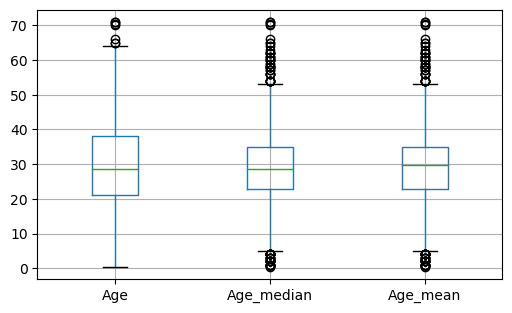

In [11]:
plt.figure(figsize = (6,3.5))
x_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<AxesSubplot:>

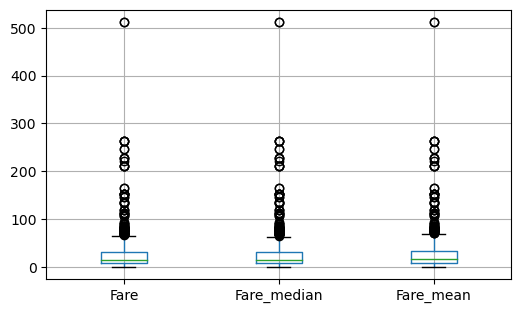

In [12]:
plt.figure(figsize = (6,3.5))
x_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

### Using Sklearn

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x , y,test_size=0.2, random_state=2)

In [14]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [15]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [16]:
trf.fit(x_train)
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [17]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])